In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re

pd.set_option('max_columns', 500)

# For plotting
from itertools import cycle

plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

OptionError: Pattern matched multiple keys

In [5]:
#load dataset
tweets = pd.read_csv('D:\\Data Analysis\\Data analyst projects\\wordle-tweets\\tweets.csv')


In [6]:
tweets.shape


(234186, 5)

In [7]:
#change format of tweet date
def process_tweets(tweets):
 tweets['tweet_datetime']=pd.to_datetime(tweets['tweet_date'])
 tweets['tweet_date']=tweets['tweet_datetime'].dt.date
 tweets['id']=tweets['tweet_text'].str[7:10].astype('int')
 tweets['wordle_id']=tweets['tweet_text'].str[:10]
 tweets['n_attempts']=tweets['tweet_text'].str[11].astype('int')
 return tweets
tweets=process_tweets(tweets)



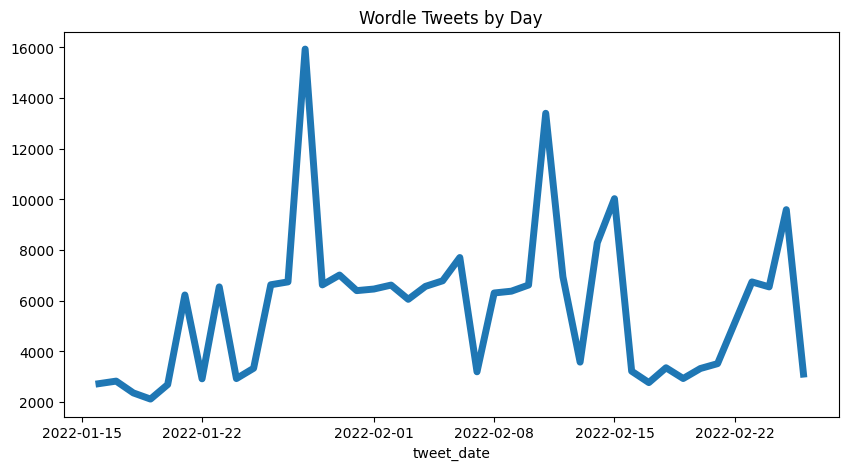

In [8]:
tweets['tweet_date'].value_counts()\
  .plot(figsize=(10,5),title='Wordle Tweets by Day', 
        lw=5)
plt.show()

In [9]:
#number of attempts analysis


In [10]:
tweets.groupby('wordle_id')['n_attempts'].value_counts()\
   .unstack()\
   .style.background_gradient(axis=1)

n_attempts,2,3,4,5,6
wordle_id,,,,,
Wordle 210,222,897,1064,489,165
Wordle 211,196,903,1016,564,215
Wordle 212,191,787,820,413,188
Wordle 213,51,260,630,697,481
Wordle 214,383,1012,823,363,122
Wordle 215,246,877,1017,579,224
Wordle 216,461,1952,2078,1199,415
Wordle 217,102,566,1031,843,418
Wordle 218,170,1009,1384,730,187


In [11]:
#how many attempts taken generally to solve the wordle

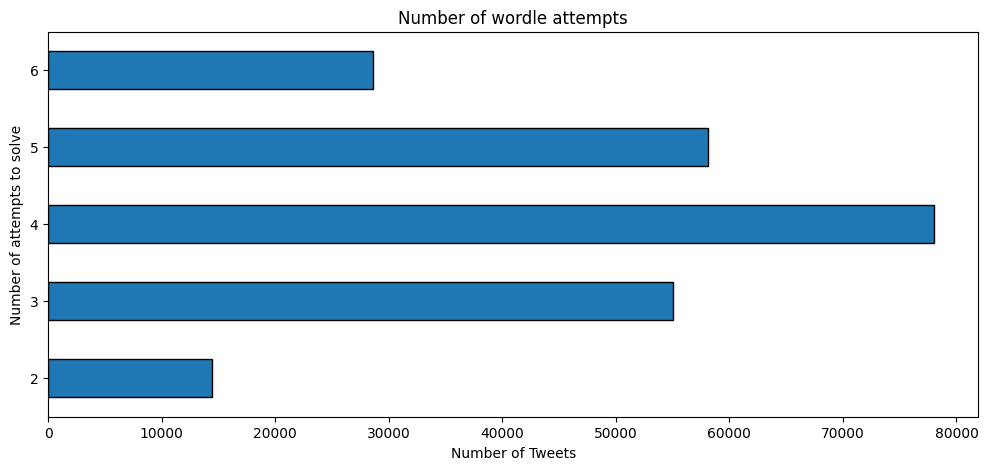

In [12]:
ax=tweets['n_attempts'].value_counts()\
    .sort_index()\
    .plot(figsize=(12,5),
          kind='barh',
          title='Number of wordle attempts',
          edgecolor='black')
ax.set_xlabel('Number of Tweets')
ax.set_ylabel('Number of attempts to solve')
plt.show()

In [13]:
#Parse tweet text


In [14]:
#make dark squares consistent
tweets['tweet_text']=tweets['tweet_text'].str.replace('⬜', '⬛')

In [15]:
n=1 #guess number
tweets['tweet_text'].str.split('\n').str[n+1]

0         ⬛⬛🟨🟨⬛
1         ⬛⬛⬛⬛⬛
2         ⬛⬛⬛🟨⬛
3         ⬛⬛🟨⬛⬛
4         ⬛⬛🟨⬛⬛
          ...  
234181    ⬛⬛⬛⬛⬛
234182    ⬛⬛⬛⬛⬛
234183    ⬛⬛⬛⬛⬛
234184    ⬛⬛🟩⬛⬛
234185    ⬛⬛⬛⬛🟩
Name: tweet_text, Length: 234186, dtype: object

In [16]:
def parse_tweet_text(tweets):
    for n in range(6):
        n += 1
        tweets[f'has_guess{n}'] = tweets['tweet_text'].str.split('\n').str[n+1] \
            .str.contains('|'.join(['🟨','⬛','🟩'])) \
            .fillna(False)

        # Parse out the tweet text
        tweets.loc[tweets[f'has_guess{n}'], f'guess{n}'] = \
                tweets['tweet_text'].str.split('\n').str[n + 1].str[:5]
# Count number correct, misplaced, and incorrect
        tweets.loc[tweets[f'has_guess{n}'],
                       f'guess{n}_incorrect'] = tweets[f'guess{n}'].str.count('⬛')
        tweets.loc[tweets[f'has_guess{n}'],
                   f'guess{n}_wrong_spot'] = tweets[f'guess{n}'].str.count('🟨')
        tweets.loc[tweets[f'has_guess{n}'],
                   f'guess{n}_correct'] = tweets[f'guess{n}'].str.count('🟩')

        tweets.loc[tweets[f'guess{n}_correct'] == 6, 'final_guess'] = n
    return tweets

tweets = parse_tweet_text(tweets)
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,id,n_attempts,has_guess1,guess1,...,has_guess5,guess5,guess5_incorrect,guess5_wrong_spot,guess5_correct,has_guess6,guess6,guess6_incorrect,guess6_wrong_spot,guess6_correct
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,210,4,True,⬛⬛🟨🟨⬛,...,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬛⬛⬛⬛⬛\n🟩🟩🟨🟨⬛\n🟩🟩⬛🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,210,4,True,⬛⬛⬛⬛⬛,...,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
2,Wordle 210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬛⬛⬛🟨⬛\n⬛🟩⬛🟨⬛\n⬛🟩⬛🟨⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00,210,4,True,⬛⬛⬛🟨⬛,...,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
3,Wordle 210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟨🟨⬛⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00,210,3,True,⬛⬛🟨⬛⬛,...,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
4,Wordle 210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00,210,3,True,⬛⬛🟨⬛⬛,...,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


In [17]:
# Keep additional tweet text
tweets['additional_text'] = \
    tweets.loc[~tweets['tweet_text'] \
    .str.split('\n').str[-1].str.contains('🟩')] \
    ['tweet_text'].str.split('\n').str[-1]


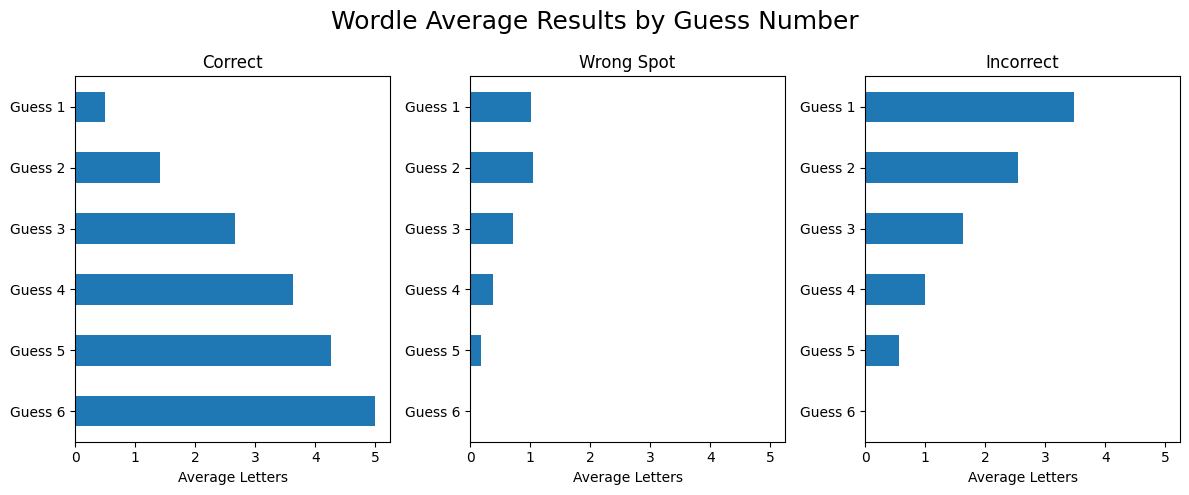

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharex=True)

for i, x in enumerate(['_correct','_wrong_spot','_incorrect']):
    col_subset = [c for c in tweets.columns if x in c]
    guess_avg = tweets[col_subset].mean()
    guess_avg.index = [f'Guess {i+1}' for i in range(6)]
    guess_avg.sort_index(ascending=False) \
        .plot(kind='barh',
              title=f'{x.strip("_").replace("_"," ").title()}',
              ax=axs[i]
              )
    axs[i].set_xlabel('Average Letters')
fig.suptitle('Wordle Average Results by Guess Number', fontsize=18)
plt.tight_layout()
plt.show()